In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
from dataprep.eda import plot

In [5]:
plot(data)

In [6]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
pd.crosstab(data.HasCrCard, data.Exited)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [9]:
from dataprep.eda import plot_missing
plot_missing(data)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
pd.crosstab(data.Gender, data.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


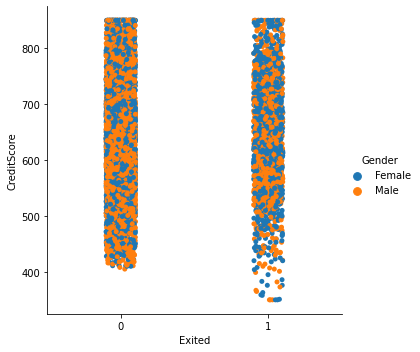

In [12]:
sns.catplot(x='Exited', y='CreditScore', hue='Gender', data=data)

Female numbers are more in the exited list in comparison to males 

In [13]:
#there are total 8 males having credit score less than 400
data[(data['Gender']=='Male') & (data['CreditScore']<400)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1201,1202,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1
8723,8724,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1
9210,9211,15792650,Watts,382,Spain,Male,36,0,0.00,1,1,1,179540.73,1
9356,9357,15734711,Loggia,373,France,Male,42,7,0.00,1,1,0,77786.37,1


In [14]:
data[(data['Gender']=='Female') & (data['CreditScore']<400)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
5285,5286,15732643,Pike,386,Spain,Female,53,1,131955.07,1,1,1,62514.65,1
5494,5495,15642821,Ijendu,383,Spain,Female,48,8,95808.19,1,0,0,137702.01,1
6253,6254,15675337,Forbes,395,Germany,Female,34,5,106011.59,1,1,1,17376.57,1
8762,8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1


People who have credit score less than 400 have all exited whether male or female.

In [15]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
data[data['Geography']=='France']['Exited'].value_counts()

0    4204
1     810
Name: Exited, dtype: int64

In [17]:
data[data['Geography']=='Germany']['Exited'].value_counts()

0    1695
1     814
Name: Exited, dtype: int64

In [18]:
data[data['Geography']=='Spain']['Exited'].value_counts()

0    2064
1     413
Name: Exited, dtype: int64

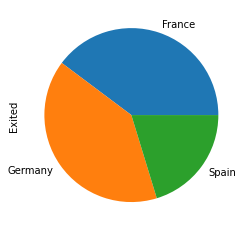

In [19]:
data[data['Exited']==1]['Exited'].groupby(data.Geography).sum().plot(kind='pie')
plt.axis()
plt.show()

In Germany, the churn percentage is more, nealry 50% in comparison to other countries.

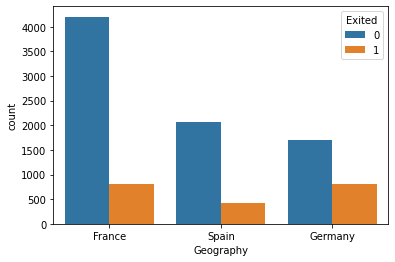

In [20]:
sns.countplot(x='Geography', hue='Exited', data=data) #[data.Geography.isin(['France','Germany','Spain'])])

In [21]:
data.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [22]:
data_age_30 = data[data['Age']<=30]
data_age_30to45 = data[(data['Age']>30) & (data['Age']<=45)]
data_age_45_above = data[(data['Age']>45)]

In [23]:
data_age_30['Exited'].value_counts()

0    1820
1     148
Name: Exited, dtype: int64

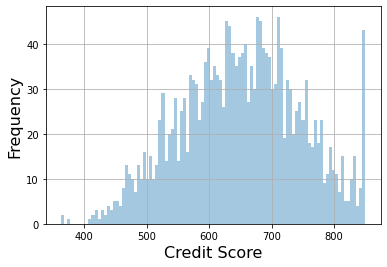

In [24]:
sns.distplot(data_age_30['CreditScore'], kde=False, bins=100)
plt.xlabel('Credit Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid()

In [25]:
data_age_30to45.Exited.value_counts()

0    4989
1     932
Name: Exited, dtype: int64

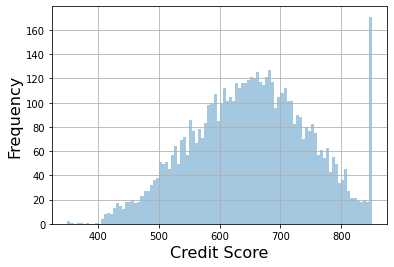

In [26]:
sns.distplot(data_age_30to45['CreditScore'], kde=False, bins=100)
plt.xlabel('Credit Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid()

In [27]:
data_age_45_above.Exited.value_counts()

0    1154
1     957
Name: Exited, dtype: int64

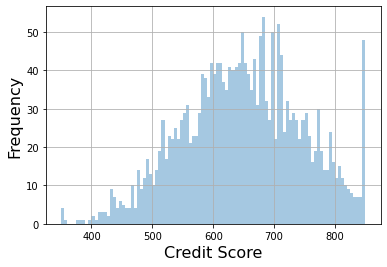

In [28]:
sns.distplot(data_age_45_above['CreditScore'], kde=False, bins=100)
plt.xlabel('Credit Score', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid()

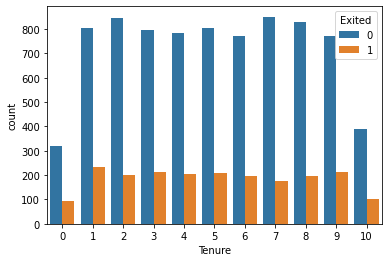

In [29]:
sns.countplot(x='Tenure',hue='Exited', data=data)

In [30]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

older clients are less likely to exit

In [31]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

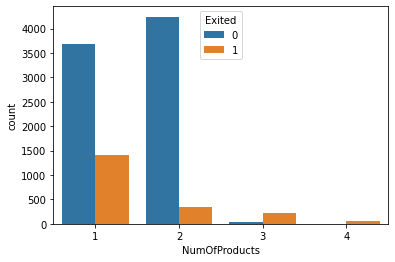

In [32]:
#Relation between the no of products and the churn
sns.countplot(x='NumOfProducts',hue='Exited', data=data)

less number of products, more likely to continue

In [33]:
pd.crosstab(data.HasCrCard, data.Exited)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


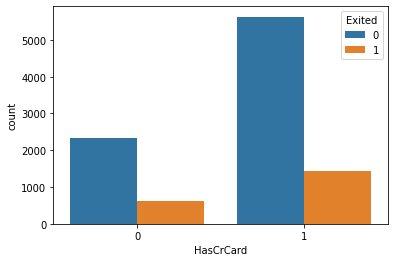

In [34]:
sns.countplot(x='HasCrCard',hue='Exited', data=data)

In [35]:
data.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [36]:
pd.crosstab(data.IsActiveMember, data.Exited)

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


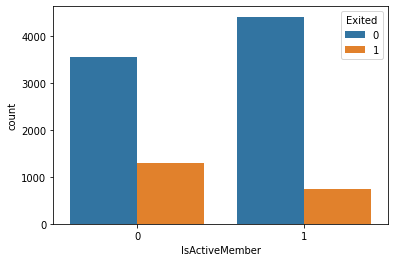

In [37]:
sns.countplot(x='IsActiveMember',hue='Exited', data=data)

very less churn in case of the active customers. Non active customers tend to exit soon

In [38]:
data[['EstimatedSalary','Balance']].describe().T

,count,mean,std,min,25%,50%,75%,max
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09


In [39]:
data['EstimatedSalary']

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [40]:
data['EstimatedSalary'].min()

11.58

In [41]:
data['EstimatedSalary'].max()

199992.48

In [42]:
data['EstimatedSalary'].quantile(0.25)

51002.11

In [43]:
data['EstimatedSalary'].quantile(0.5)

100193.915

In [44]:
data['EstimatedSalary'].quantile(0.75)

149388.2475

In [45]:
from scipy import stats

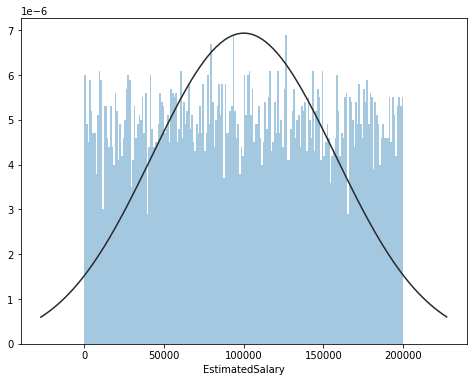

In [46]:
plt.figure(figsize=(8,6))
sns.distplot(data['EstimatedSalary'], bins=200, kde=False, fit=stats.gamma)
plt.show()

In [47]:
data['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

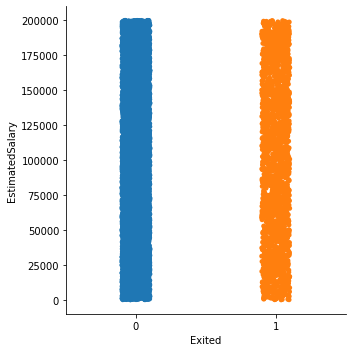

In [48]:
sns.catplot(x='Exited', y='EstimatedSalary',data=data)

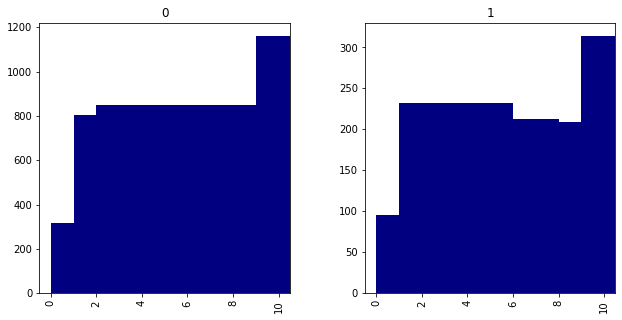

In [49]:
fig=data['Tenure'].hist(by=data['Exited'],figsize=(10,5),width=5,color='navy' )
plt.show()

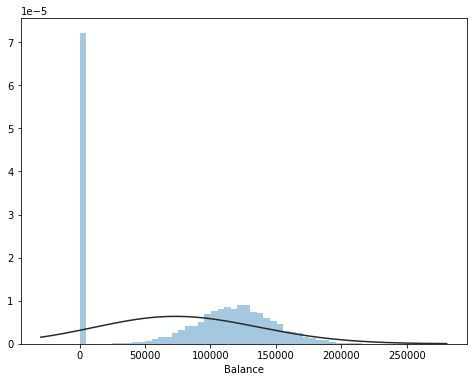

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(data['Balance'], bins=50, kde=False, fit=stats.gamma)
plt.show()

In [51]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

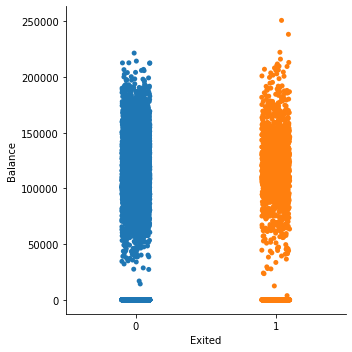

In [52]:
sns.catplot(x='Exited', y='Balance',data=data)

Checking for the distribution of observation

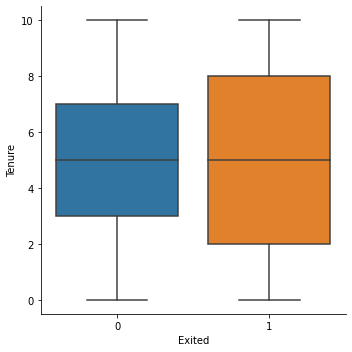

In [53]:
sns.catplot(x='Exited',y='Tenure',kind='box',data=data)

75% of the people who churned have stayed less than 8 years.

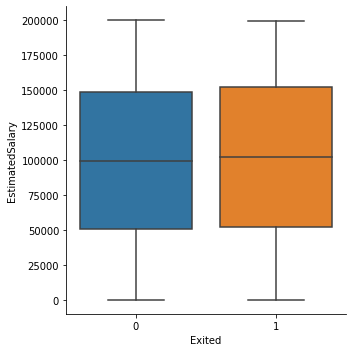

In [54]:
sns.catplot(x='Exited',y='EstimatedSalary',kind='box',data=data)

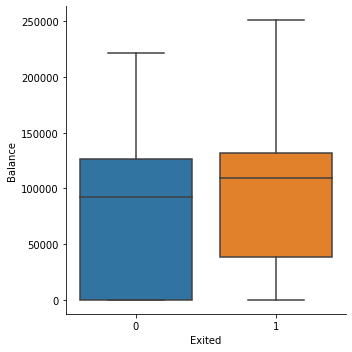

In [55]:
sns.catplot(x='Exited',y='Balance',kind='box',data=data)

People who exited have a higher Balance in comparison to people who did not churn.

#Feature Selection

In [56]:
list(data)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [57]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])

In [58]:
data.corr(method='pearson')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


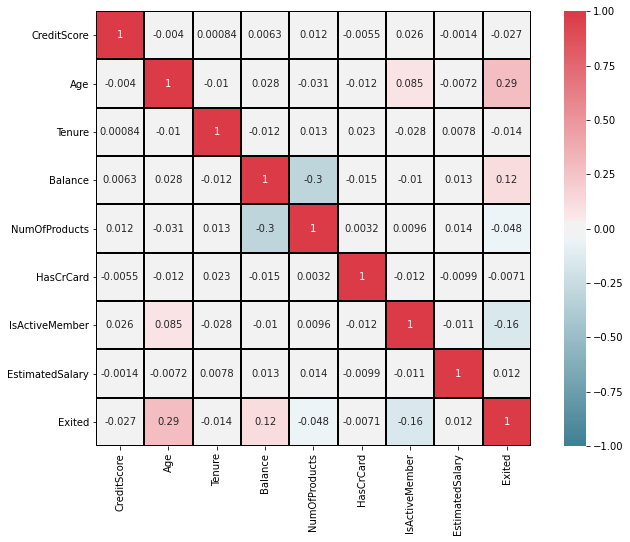

In [59]:
f, ax = plt.subplots(figsize=(12,8))

#Generating Corelation Matrix
corr = data.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

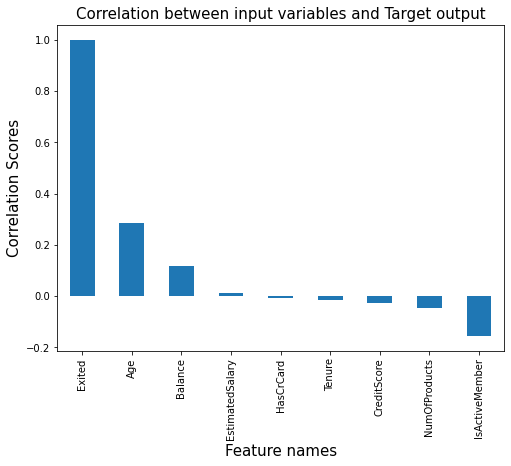

In [60]:
#Plotting the Bar Plot to show the correlations between input variables and target output 'Exited'
plt.figure(figsize=(8,6))
ax = data.corr()['Exited'].sort_values(ascending = False)
ax.plot(kind='bar')
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15)          
plt.xticks(rotation=90);

In particular, there are no highly correlated features. However Age and Balance are positively correlated and IsActiveMember is negatively correlated

In [61]:
#one-hot encoding
data_final = pd.get_dummies(data)

In [62]:
data_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [63]:
#using train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X1 = data_final.drop(['Exited'],axis=1)
features =list(X1)

scaler = MinMaxScaler()
X=pd.DataFrame(data=scaler.fit_transform(X1), columns=features)

y = data_final['Exited']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [64]:
#scaled_list = pd.DataFrame(data=X, columns = list(X1))
#scaled_list

In [65]:
#using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.13862879 0.23227106 0.10665168 0.13411    0.1427996  0.02173217
 0.0364921  0.13749338 0.00842086 0.021785   0.00651085 0.00660863
 0.00649586]


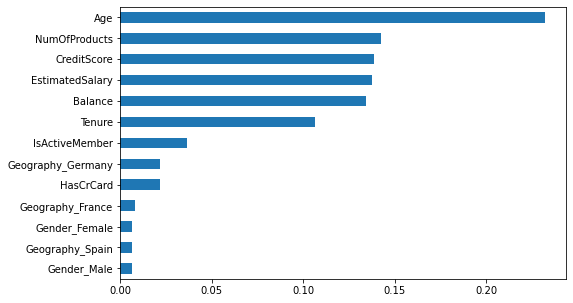

In [66]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
#feat_importances.sort_values(ascending=True)
plt.figure(figsize=(8,5))
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [67]:
#Using Forward Search
from mlxtend.feature_selection import SequentialFeatureSelector
forward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=6,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [68]:
fselector = forward_feature_selector.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   30.7s finished

[2020-05-11 00:46:22] Features: 1/6 -- score: 0.7473165340322451[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   27.9s finished

[2020-05-11 00:46:50] Features: 2/6 -- score: 0.8127200446232842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   30.5s finished

[2020-05-11 00:47:21] Features: 3/6 -- score: 0.8251232962842842[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [69]:
fselector.k_feature_names_

('Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany')

In [70]:
#Using Backward Search
from mlxtend.feature_selection import SequentialFeatureSelector
backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=8,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

In [71]:
fselector_bk = backward_feature_selector.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   45.8s finished

[2020-05-11 00:49:27] Features: 12/8 -- score: 0.853667127576797[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   49.8s finished

[2020-05-11 00:50:16] Features: 11/8 -- score: 0.8542697163375901[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   40.7s finished

[2020-05-11 00:50:57] Features: 10/8 -- score: 0.8543033921776001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [72]:
fselector_bk.k_feature_names_

('CreditScore',
 'Age',
 'Balance',
 'NumOfProducts',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Gender_Male')

Both Forward and Backward feature selection give almost the same important features. For Backward selection process we have considered 8 features.  Features are Age,Balance,NumOfProducts,IsActiveMember, EstimatedSalary,Geography_Germany,CreditScore and Gender_Female. lets see for the recursive feature elimination method.

Optimal number of features : 9


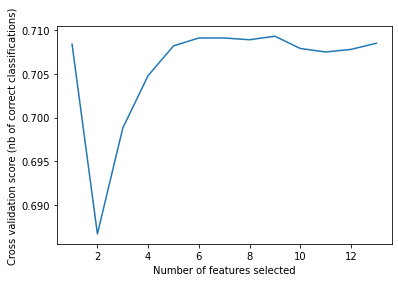

In [73]:
#using Recursive Feature elimination method with cross validation
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#using Logistic Regression as Estimator
lr = LogisticRegression(class_weight='balanced')
#lr = LogisticRegression()

rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),min_features_to_select=1,
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()




In [74]:
print(np.where(rfecv.support_ == False)[0])

[ 2  5  7 10]


In [75]:
rfecv.support_

array([ True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True,  True])

In [76]:
X1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [77]:
#using Chi-square test to get the feature scores
from sklearn.feature_selection import SelectKBest,chi2
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X,y)


In [78]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X1.columns)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['features','Score']

featureScores.sort_values(by ='Score', ascending=False)


,features,Score
9,Geography_Germany,225.464426
6,IsActiveMember,118.199414
11,Gender_Female,61.909174
1,Age,57.832080
8,Geography_France,54.923705
12,Gender_Male,51.539926
3,Balance,28.502819
10,Geography_Spain,20.867206
4,NumOfProducts,4.863425
0,CreditScore,0.456316


Higher the chi2 score, higher is the importance of the feature for the target output. Features at the bottom are the ones which were also shown least importance by RFECV

checking with parameter , minimum number of features =10 in RFECV as we cant take out one Geographical location Spain while considering other two. 

Optimal number of features : 13


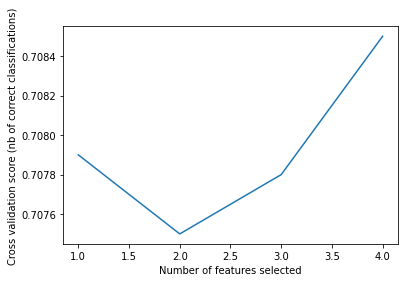

In [79]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#using Logistic Regression as Estimator
lr = LogisticRegression(class_weight='balanced')
#lr = LogisticRegression()

rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),min_features_to_select=10,
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Selecting minimum number of features as 10, RFECV gives optimal number of features as 13. so considering all the features. 

Fitting the Machine Learning Models

In [80]:
#Fitting a Logistic Regression model
lr_model = LogisticRegression(random_state=818,solver='lbfgs',class_weight='balanced') 
lr_model.fit(X_train,y_train) 
lr_y_pred=lr_model.predict(X_test)

In [81]:
lr_score = roc_auc_score(y_true=y_test, y_score = lr_y_pred)
print("AUC Score:",lr_score)

AUC Score: 0.6890989253899891


In [82]:
#Confusion Matrix for Logistic Regression
pd.crosstab(y_test,lr_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1139,439,1578
1,145,277,422
All,1284,716,2000


In [83]:
#Printing the Classification report
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1578
           1       0.39      0.66      0.49       422

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.71      0.73      2000



In [84]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, lr_y_pred))
print("Precision:",metrics.precision_score(y_test, lr_y_pred))
print("Recall:",metrics.recall_score(y_test, lr_y_pred))
print("F1 Score:",metrics.f1_score(y_test, lr_y_pred))

Accuracy: 0.708
Precision: 0.38687150837988826
Recall: 0.6563981042654028
F1 Score: 0.48681898066783835


In [85]:
# RandomForestClassifier
for_clf = RandomForestClassifier(random_state=10,n_jobs=-1,class_weight='balanced')
for_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [86]:
forest_y_pred=for_clf.predict(X_test)
forest_score=roc_auc_score(y_true=y_test,y_score=forest_y_pred)
print("AUC Score:", forest_score)


AUC Score: 0.7017671898557776


In [87]:
#Confusion Matrix for Random Forest
pd.crosstab(y_test,forest_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1523,55,1578
1,237,185,422
All,1760,240,2000


In [88]:
print("Accuracy:",metrics.accuracy_score(y_test, forest_y_pred))
print("Precision:",metrics.precision_score(y_test, forest_y_pred))
print("Recall:",metrics.recall_score(y_test, forest_y_pred))
print("F1 Score:",metrics.f1_score(y_test, forest_y_pred))

Accuracy: 0.854
Precision: 0.7708333333333334
Recall: 0.43838862559241704
F1 Score: 0.5589123867069485


In [89]:
#Printing the Classification report
print(classification_report(y_test,forest_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1578
           1       0.77      0.44      0.56       422

    accuracy                           0.85      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.85      0.84      2000



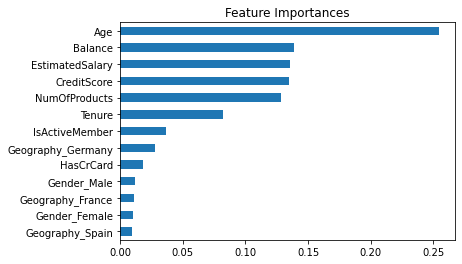

In [90]:
coef_rf = pd.Series(for_clf.feature_importances_, X1.columns).sort_values(ascending=True)
coef_rf.plot(kind='barh', title='Feature Importances')

In [91]:
#Using KNN Classifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
pred = model_knn.predict(X_test)

knn_score=roc_auc_score(y_true=y_test,y_score=pred)
print("AUC Score:",knn_score)

AUC Score: 0.6146961478624932


In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))
print("F1 Score:",metrics.f1_score(y_test, pred))

Accuracy: 0.807
Precision: 0.5891089108910891
Recall: 0.28199052132701424
F1 Score: 0.38141025641025644


In [94]:
#Confusion Matrix for KNN
pd.crosstab(y_test,pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1495,83,1578
1,303,119,422
All,1798,202,2000


In [95]:
#Printing the Classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1578
           1       0.59      0.28      0.38       422

    accuracy                           0.81      2000
   macro avg       0.71      0.61      0.63      2000
weighted avg       0.78      0.81      0.78      2000



<b> KNN model performed very poorly for the classification

In [96]:
# For XGBoost Model
model_gb =  XGBClassifier()
model_gb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [97]:
y_pred_test = model_gb.predict(X_test)
xgb_score=roc_auc_score(y_true=y_test,y_score=y_pred_test)
print("AUC Score:", xgb_score)

AUC Score: 0.7169913322401023


In [98]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Precision:",metrics.precision_score(y_test, y_pred_test))
print("Recall:",metrics.recall_score(y_test, y_pred_test))
print("F1 Score:",metrics.f1_score(y_test, y_pred_test))

Accuracy: 0.852
Precision: 0.723404255319149
Recall: 0.4834123222748815
F1 Score: 0.5795454545454545


In [99]:
#Confusion Matrix for XGBoost
pd.crosstab(y_test,y_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1500,78,1578
1,218,204,422
All,1718,282,2000


In [100]:
#Printing the Classification report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.72      0.48      0.58       422

    accuracy                           0.85      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [101]:
#Using AdaBoost Classifier
ad_clf = AdaBoostClassifier()
ad_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [102]:
ada_pred_test = ad_clf.predict(X_test)
ada_score=roc_auc_score(y_true=y_test,y_score=ada_pred_test)
print("AUC Score:", ada_score)

AUC Score: 0.7102817772812188


In [103]:
print("Accuracy:",metrics.accuracy_score(y_test, ada_pred_test))
print("Precision:",metrics.precision_score(y_test, ada_pred_test))
print("Recall:",metrics.recall_score(y_test, ada_pred_test))
print("F1 Score:",metrics.f1_score(y_test, ada_pred_test))

Accuracy: 0.851
Precision: 0.7296296296296296
Recall: 0.466824644549763
F1 Score: 0.569364161849711


In [104]:
#Confusion Matrix for AdaBoost
pd.crosstab(y_test,ada_pred_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1505,73,1578
1,225,197,422
All,1730,270,2000


In [105]:
#Printing the Classification report
print(classification_report(y_test,ada_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1578
           1       0.73      0.47      0.57       422

    accuracy                           0.85      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



we want to select a model that has a higher recall as we want our model to predict less number of False negatives. Our model should predict less number of predicters as not churned when actually they churned. Logistic regression model gives us the higher recall and AUC score is also comparable with other models used. so we can further hypertune it to increase the accuracy of prediction. AUC score indicates how well our model can distinguish between the two classes.

In [106]:
#using GridSearchCV

In [107]:
#Parameters
#regularization penalty 
penalty = ['l1', 'l2']

#regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [108]:
logistic = LogisticRegression()
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0,n_jobs=-1)

In [109]:
best_model = clf.fit(X_train, y_train)

In [110]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("accuracy :",best_model.best_score_)

Best Penalty: l2
Best C: 1.0
accuracy : 0.81375


In [111]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [112]:
sm_clf = LogisticRegression()
model_res = sm_clf.fit(X_train_res, y_train_res)

In [113]:
sm_lr_pred = model_res.predict(X_test)
sm_lr_score = roc_auc_score(y_true=y_test, y_score = sm_lr_pred)
print("AUC Score:",sm_lr_score)

AUC Score: 0.695119204223956


In [114]:
#Confusion Matrix for Logistic Regression
pd.crosstab(y_test,sm_lr_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1158,420,1578
1,145,277,422
All,1303,697,2000


Although there is no much change, but the false positive rate has reduced. i.e the customer who did not churn but was predicted by the model as churned.

For finding the important features,we use RandomizedCV(as it takes less time in comparison to GridSearchCV) on the RandomForest model to hypertune it.

In [115]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
    "min_samples_split":[2,5,10,15],
    "min_samples_leaf": [1,2,5,10],
    "max_depth":[2,5,8, None],
    "max_features":["auto","sqrt"],
    "bootstrap":[True, False],
    "n_estimators":[int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
    }

In [116]:
parameters

{'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 2, 5, 10],
 'max_depth': [2, 5, 8, None],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False],
 'n_estimators': [20, 65, 110, 155, 200]}

In [117]:
rf_best = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions =parameters, 
                                         n_iter = 500, cv = 3, verbose=2, random_state=1, n_jobs = -1)
rf_best.fit(X_train, y_train)
rf_best.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  7.0min finished


{'n_estimators': 110,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [118]:
model_rf = RandomForestClassifier(n_estimators=65,min_samples_split=15,max_depth=None,bootstrap=True,
                                  max_features='auto',min_samples_leaf=2,n_jobs=-1)
model_rf.fit(X_train,y_train)
predictions = model_rf.predict(X_test)

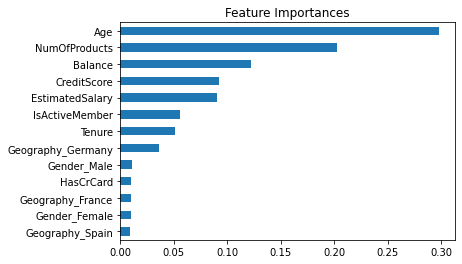

In [119]:
coef_rf = pd.Series(model_rf.feature_importances_, X1.columns).sort_values(ascending=True)
coef_rf.plot(kind='barh', title='Feature Importances')

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1Score:",metrics.f1_score(y_test, predictions))



Accuracy: 0.85
Precision: 0.7520661157024794
Recall: 0.4312796208530806
F1Score: 0.5481927710843374


Model Explanation through SHAP

In [121]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [122]:
explainer = shap.TreeExplainer(model_gb)
shap_values = explainer.shap_values(X_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [123]:
# visualize the first prediction's explanation 
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

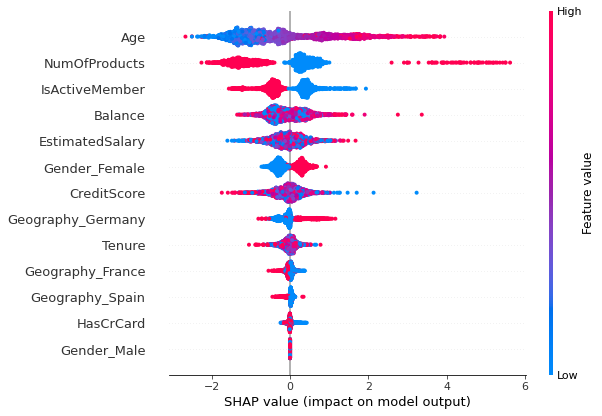

In [124]:
shap.summary_plot(shap_values, X_test)

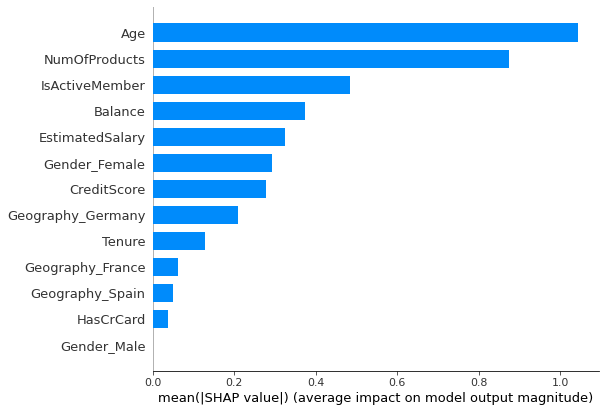

In [125]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Important features given by RandomForest are Age, Number of products, Balance, Credit score, Estimated Salary, Isactive member and Tenure.
Geography is important if the customer is in Germnay. Customers in Germamny have a higher churn rate.

<b> Implementing the ML model taking features from the Extra Tree classifier and Fwd, Bkwd feature selection to check if the accuracy and recall is increased.

 Features are Age,Balance,NumOfProducts,IsActiveMember, EstimatedSalary,Geography_Germany, Tenure

In [126]:
df=data_final[['CreditScore','Age','Balance','NumOfProducts','IsActiveMember','EstimatedSalary','Gender_Female','Geography_Germany','Exited']]

In [127]:
df.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Gender_Female,Geography_Germany,Exited
0,619,42,0.00,1,1,101348.88,1,0,1
1,608,41,83807.86,1,1,112542.58,1,0,0
2,502,42,159660.80,3,0,113931.57,1,0,1
3,699,39,0.00,2,0,93826.63,1,0,0
4,850,43,125510.82,1,1,79084.10,1,0,0


In [128]:
#Scaling the data
scaler=MinMaxScaler()
df1=df.drop(columns='Exited')
feature_names=list(df1)
y=df['Exited']

In [129]:
df1=pd.DataFrame(data=scaler.fit_transform(df1), columns=feature_names)

In [130]:
df1.head()

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Gender_Female,Geography_Germany
0,0.538,0.324324,0.000000,0.000000,1.0,0.506735,1.0,0.0
1,0.516,0.310811,0.334031,0.000000,1.0,0.562709,1.0,0.0
2,0.304,0.324324,0.636357,0.666667,0.0,0.569654,1.0,0.0
3,0.698,0.283784,0.000000,0.333333,0.0,0.469120,1.0,0.0
4,1.000,0.337838,0.500246,0.000000,1.0,0.395400,1.0,0.0


In [131]:
#train-test split
X1_train, X1_test, y1_train, y1_test = train_test_split(df1, y, test_size=0.2, random_state=10)

In [132]:
#Using Logistic-Regression
lr_model1 = LogisticRegression(random_state=818,solver='lbfgs',class_weight='balanced') 
lr_model1.fit(X1_train,y1_train) 
lr_y_pred1=lr_model1.predict(X1_test)

In [133]:
lr_score1 = roc_auc_score(y_true=y1_test, y_score = lr_y_pred1)
print("AUC Score:",lr_score1)

AUC Score: 0.6900494957321944


In [135]:
#Confusion Matrix for Logistic Regression
pd.crosstab(y1_test,lr_y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1142,436,1578
1,145,277,422
All,1287,713,2000


In [136]:
#Printing the Classification report
print(classification_report(y1_test,lr_y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1578
           1       0.39      0.66      0.49       422

    accuracy                           0.71      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.71      0.73      2000



In [137]:
#using Random-forest model
# RandomForestClassifier
for_clf1 = RandomForestClassifier(random_state=10,n_jobs=-1,class_weight='balanced')
for_clf1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [138]:
forest_y_pred1=for_clf1.predict(X1_test)
forest_score1=roc_auc_score(y_true=y1_test,y_score=forest_y_pred1)
print("AUC Score:", forest_score1)


AUC Score: 0.7110806768421243


In [139]:
#Confusion Matrix for Random Forest
pd.crosstab(y1_test,forest_y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1515,63,1578
1,227,195,422
All,1742,258,2000


<b> using LogisticRegression and RandomForest did not show much significant results on reduced feature. So trying one final time with XGBoost taking smaple_pos_weight parameter

In [140]:
xgb_model = XGBClassifier(scale_pos_weight=2)
xgb_model.fit(X1_train, y1_train)

print("Accuracy on training set: {:.3f}".format(xgb_model.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(xgb_model.score(X1_test, y1_test)))

Accuracy on training set: 0.959
Accuracy on test set: 0.838


In [141]:
y_pred_test1 = xgb_model.predict(X1_test)
xgb_score=roc_auc_score(y_true=y1_test,y_score=y_pred_test1)
print("AUC Score:", xgb_score)

AUC Score: 0.7347097832159012


In [142]:
#Confusion Matrix for XGBoost
pd.crosstab(y1_test,y_pred_test1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1440,138,1578
1,187,235,422
All,1627,373,2000


In [143]:
#Printing the Classification report
print(classification_report(y1_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1578
           1       0.63      0.56      0.59       422

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.83      0.84      0.83      2000



Now taking the sample_pos_weight parameter as 3,4 and 5, and checking for increase in recall without much decrease in precision of F1-score

In [144]:
xgb_model1 = XGBClassifier(scale_pos_weight=3)
xgb_model1.fit(X1_train, y1_train)

print("Accuracy on training set: {:.3f}".format(xgb_model1.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(xgb_model1.score(X1_test, y1_test)))

Accuracy on training set: 0.960
Accuracy on test set: 0.822


In [145]:
y_pred_test2 = xgb_model1.predict(X1_test)
xgb_score1=roc_auc_score(y_true=y1_test,y_score=y_pred_test2)
print("AUC Score:", xgb_score1)

AUC Score: 0.745401822452081


In [146]:
#Printing the Classification report
print(classification_report(y1_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1578
           1       0.57      0.61      0.59       422

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000



In [147]:
#Confusion Matrix for XGBoost
pd.crosstab(y1_test,y_pred_test2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1384,194,1578
1,163,259,422
All,1547,453,2000


In [148]:
#Printing the Classification report
print(classification_report(y1_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1578
           1       0.57      0.61      0.59       422

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.82      2000



In [149]:
#for sample_pos_weight=4
xgb_model2 = XGBClassifier(scale_pos_weight=4)
xgb_model2.fit(X1_train, y1_train)

print("Accuracy on training set: {:.3f}".format(xgb_model2.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(xgb_model2.score(X1_test, y1_test)))

Accuracy on training set: 0.950
Accuracy on test set: 0.810


In [150]:
y_pred_test3 = xgb_model2.predict(X1_test)
xgb_score2=roc_auc_score(y_true=y1_test,y_score=y_pred_test3)
print("AUC Score:", xgb_score2)

AUC Score: 0.7462427693582975


In [151]:
#Confusion Matrix for XGBoost
pd.crosstab(y1_test,y_pred_test3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1353,225,1578
1,154,268,422
All,1507,493,2000


In [152]:
#Printing the Classification report
print(classification_report(y1_test,y_pred_test3))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1578
           1       0.54      0.64      0.59       422

    accuracy                           0.81      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.82      0.81      0.82      2000



In [153]:
#for sample_pos_weight=5
xgb_model3 = XGBClassifier(scale_pos_weight=5)
xgb_model3.fit(X1_train, y1_train)

print("Accuracy on training set: {:.3f}".format(xgb_model3.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(xgb_model3.score(X1_test, y1_test)))

Accuracy on training set: 0.930
Accuracy on test set: 0.800


In [154]:
y_pred_test4 = xgb_model3.predict(X1_test)
xgb_score3=roc_auc_score(y_true=y1_test,y_score=y_pred_test4)
print("AUC Score:", xgb_score3)

AUC Score: 0.7534764144426624


In [155]:
#Confusion Matrix for XGBoost
pd.crosstab(y1_test,y_pred_test4, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1316,262,1578
1,138,284,422
All,1454,546,2000


In [156]:
#Printing the Classification report
print(classification_report(y1_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1578
           1       0.52      0.67      0.59       422

    accuracy                           0.80      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.82      0.80      0.81      2000



<b> we can consider the parameter sample_pos_weight as 4. At 4 we see that the false negative has reduced and there is not much increase in the false positive rate. we can penalize greatly for the errors in the minor class. However, that would increase the recall  and reduce the F1 score. So we choose the sample_pos_weight as 4

<b> we get an accuracy of 81% on the test set. AUC score of 0.75 as well as a good recall and F1 score 

we can further assess the performance of the model by doing cross validation

In [157]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(xgb_model2, df1, y, cv=10)
print ("Cross-validated scores:", scores)
print("Mean score: {}".format(np.mean(scores)))

Cross-validated scores: [0.82  0.817 0.828 0.824 0.807 0.816 0.82  0.829 0.826 0.818]
Mean score: 0.8205


<b> MODEL EXPLANATION using SHAP

In [158]:
import shap
shap.initjs()

In [159]:
explainer = shap.TreeExplainer(xgb_model2)
shap_values = explainer.shap_values(X1_test)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [160]:
# visualize the first prediction's explanation 
shap.force_plot(explainer.expected_value, shap_values[0,:], X1_test.iloc[0,:])

Summary Plot

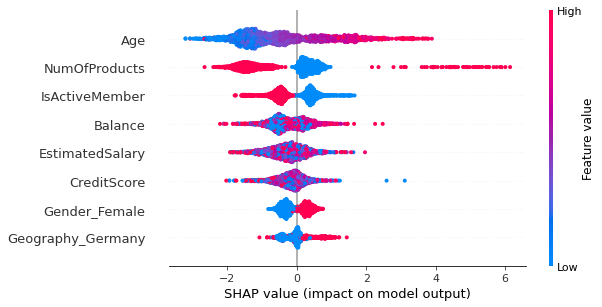

In [161]:
shap.summary_plot(shap_values, X1_test)

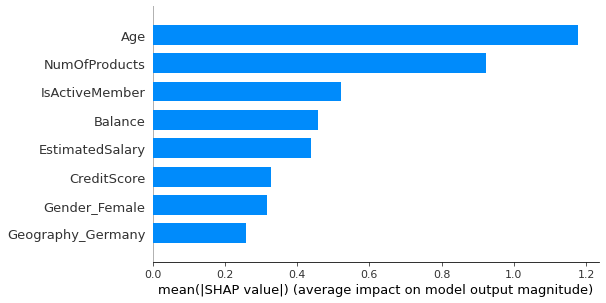

In [162]:
shap.summary_plot(shap_values, X1_test, plot_type="bar")

Dependency Plot

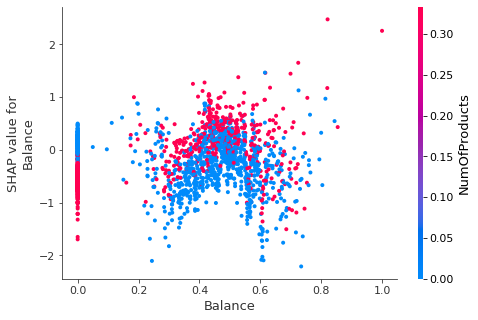

In [164]:
shap.dependence_plot("Balance", shap_values, X1_test)

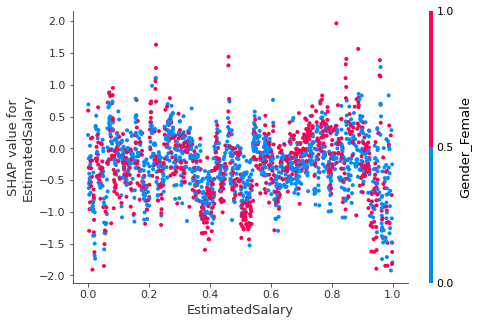

In [165]:
shap.dependence_plot("EstimatedSalary", shap_values, X1_test)

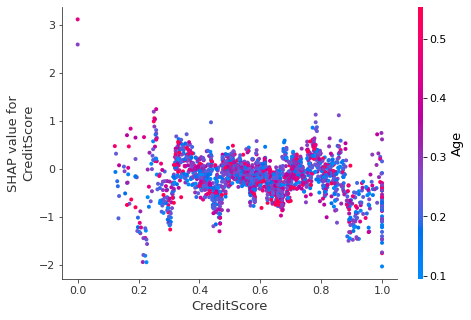

In [166]:
shap.dependence_plot("CreditScore", shap_values, X1_test)

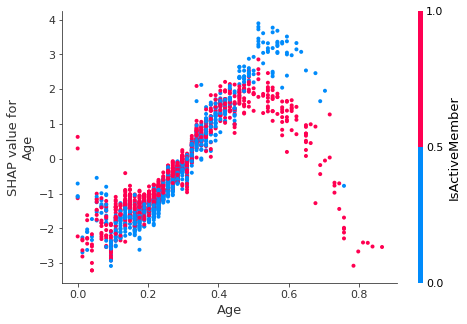

In [168]:
shap.dependence_plot("Age", shap_values, X1_test)